#Importing Pandas and Seaborn Library


In [1]:
import pandas as pd
import seaborn as sns

#Read CSV file by loading into Dataframe

In [2]:
df = pd.read_csv('Admission_Predict.csv')

#No. of columns in the dataset 

In [3]:
df.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.shape

(400, 9)

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#Importing the Binarizer class to perfom the Binariztion

In [6]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75) 
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])

In [7]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


#Deciding the input/output variable

In [20]:
x = df.drop(['Serial No.','Chance of Admit '], axis = 1)# input variable
y = df['Chance of Admit ']#output variable

In [21]:
x


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


#Changing the datatype of the output variable from flot to int

In [22]:
y = y.astype('int')


In [23]:
y


0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

#checking the no. of values for 0 and 1 in graphical format

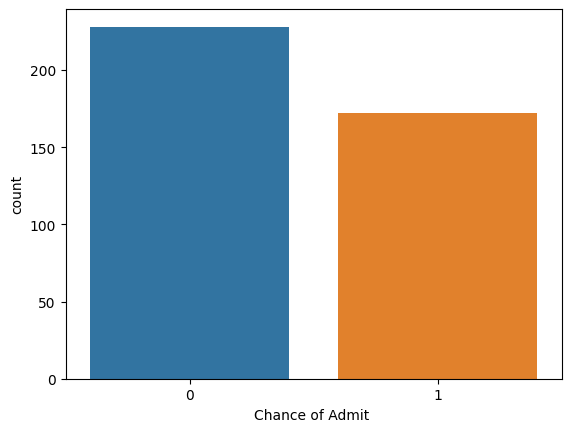

In [24]:
sns.countplot(x = y); 

#checking the no. of values for 0 and 1 in numarical format

In [25]:
y.value_counts()

0    228
1    172
Name: Chance of Admit , dtype: int64

#importing the train_test_split library for datapreparation

In [26]:
#cross-validation
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

In [27]:
x_train.shape


(300, 7)

In [28]:
x_test.shape

(100, 7)

In [29]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,309,105,5,3.5,3.5,8.56,0
309,308,110,4,3.5,3.0,8.60,0
341,326,110,3,3.5,3.5,8.76,1
196,306,105,2,3.0,2.5,8.26,0
246,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...
146,315,105,3,2.0,2.5,8.48,0
135,314,109,4,3.5,4.0,8.77,1
390,314,102,2,2.0,2.5,8.24,0
264,325,110,2,3.0,2.5,8.76,1


#importing the svm from the sklearn

In [30]:
from sklearn import svm

#Create a svm Classifier

In [31]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets

In [32]:
clf.fit(x_train, y_train)

SVC(kernel='linear')

#Testing the model

In [33]:
y_pred = clf.predict(x_test)

#compairing the predicted and actual values by the model

In [34]:
result = pd.DataFrame({ 
    'actual':y_test, 
    'predicted':y_pred
})

In [35]:
result

,actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,0
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


#Evaluating the model

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score 
from sklearn.metrics import classification_report

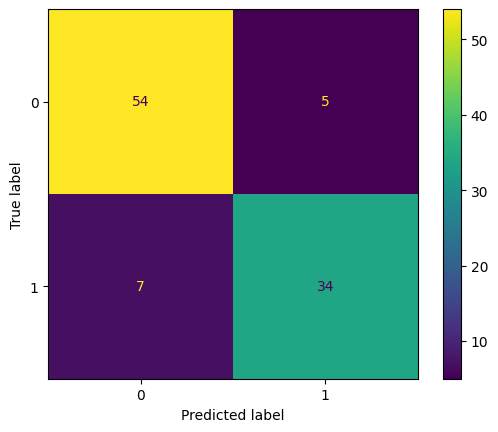

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [38]:
accuracy_score(y_test, y_pred)

0.88

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        59
           1       0.87      0.83      0.85        41

    accuracy                           0.88       100
   macro avg       0.88      0.87      0.88       100
weighted avg       0.88      0.88      0.88       100

